In [1]:
# from here we will continue uploading 

Loading data...
Training samples: 25000
Test samples: 25000


C:\Users\ajays\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ ?                           │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Training model...
Epoch 1/10
157/157 - 12s - 79ms/step - accuracy: 0.6564 - loss: 0.6339 - val_accuracy: 0.7810 - val_loss: 0.5030
Epoch 2/10
157/157 - 6s - 37ms/step - accuracy: 0.8324 - loss: 0.3937 - val_accuracy: 0.8552 - val_loss: 0.3455
Epoch 3/10
157/157 - 6s - 40ms/step - accuracy: 0.9006 - loss: 0.2604 - val_accuracy: 0.8754 - val_loss: 0.3039
Epoch 4/10
157/157 - 6s - 39ms/step - accuracy: 0.9342 - loss: 0.1824 - val_accuracy: 0.8782 - val_loss: 0.3011
Epoch 5/10
157/157 - 6s - 37ms/step - accuracy: 0.9614 - loss: 0.1253 - val_accuracy: 0.8824 - val_loss: 0.3011
Epoch 6/10
157/157 - 6s - 36ms/step - accuracy: 0.9791 - loss: 0.0836 - val_accuracy: 0.8818 - val_loss: 0.3186
Epoch 7/10
157/157 - 6s - 37ms/step - accuracy: 0.9896 - loss: 0.0533 - val_accuracy: 0.8806 - val_loss: 0.3353
Epoch 8/10
157/157 - 6s - 37ms/step - accuracy: 0.9956 - loss: 0.0336 - val_accuracy: 0.8782 - val_loss: 0.3582
Epoch 9/10
157/157 - 6s - 36ms/step - accuracy: 0.9984 - loss: 0.0207 - val_accuracy:

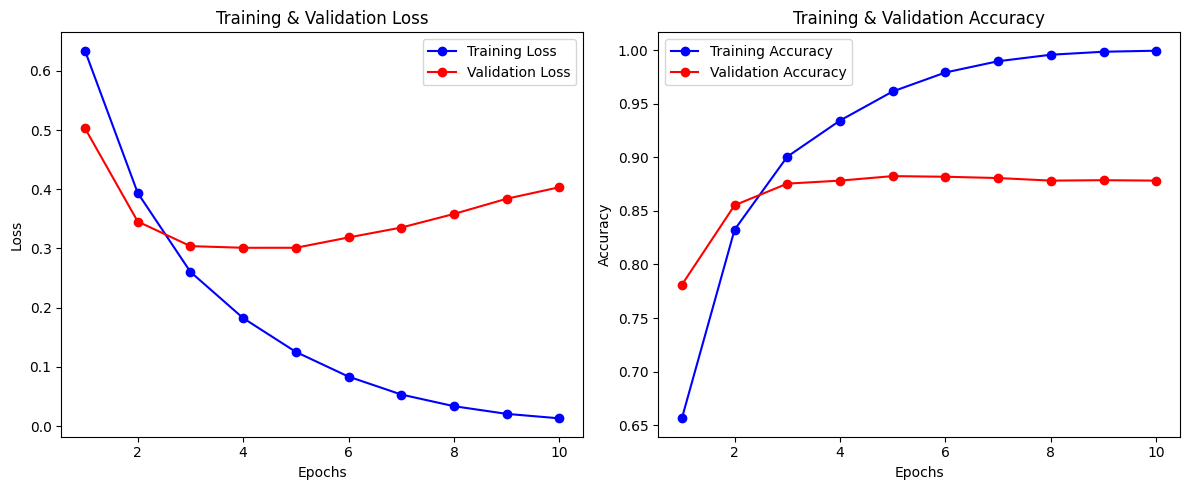

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.optimizers import Adam

# ----------------------------
# 1. Data Loading and Preprocessing
# ----------------------------

# Set parameters for data loading and preprocessing
max_features = 10000  # Use top 10,000 most frequent words
max_len = 500         # Pad or truncate reviews to 500 words
embedding_dim = 32    # Dimension for word embeddings

# Load the IMDB dataset (binary sentiment classification)
# The dataset comes pre-split into training and test sets
print("Loading data...")
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

print(f"Training samples: {len(x_train)}")
print(f"Test samples: {len(x_test)}")

# Pad sequences to ensure equal length for each review
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

# ----------------------------
# 2. Model Building
# ----------------------------

# Build a simple CNN-based model for text classification
model = Sequential()
# Embedding layer: maps word indices to dense vectors of fixed size
model.add(Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=max_len))
# Convolutional layer: extracts local features using 32 filters with a kernel size of 7
model.add(Conv1D(filters=32, kernel_size=7, activation='relu'))
# Global max pooling: takes the maximum value from each feature map
model.add(GlobalMaxPooling1D())
# Output layer: a single neuron with sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model using Adam optimizer and binary crossentropy loss
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# ----------------------------
# 3. Model Training
# ----------------------------

# Train the model using 20% of training data for validation
print("Training model...")
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=10,
                    validation_split=0.2,
                    verbose=2)

# ----------------------------
# 4. Model Evaluation
# ----------------------------

# Evaluate the model on the test set
print("Evaluating model on test data...")
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nFinal Test Loss: {test_loss:.4f}")
print(f"Final Test Accuracy: {test_acc:.4f}")

# ----------------------------
# 5. Plot Training History
# ----------------------------

# Plot the loss and accuracy curves for training and validation
epochs = range(1, len(history.history['loss']) + 1)

plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['loss'], 'bo-', label='Training Loss')
plt.plot(epochs, history.history['val_loss'], 'ro-', label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['accuracy'], 'bo-', label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'ro-', label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
